## Question 3: What characteristics of countries are predictors for differences in life expectancies?

## stepwise linear regression feature selection

We use linear regression to model the life expentancy. We calculate models, evaluate them and select be best fitting model. We can then use this model to answer our question.


### Dataset

We use data allready cleaned data. Variables with skewed Distributions were log transformed. This transformation makes the data better suitable for linear regression.

Variables are also scaled to have easily interpretable models.

In [7]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
import pandas as pd
import sklearn.datasets as datasets
from sklearn import linear_model, preprocessing
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('data/processed/data_flat_clean_transformed.csv')
print(data.columns)

vars = ['GDP per Capita', 'Surface area (sq. km)', 'Population, total',
       'Population density (people per sq. km of land area)',
       'PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)',
       'Mortality caused by road traffic injury (per 100,000 people)',
       'Intentional homicides (per 100,000 people)',
       'Individuals using the Internet (% of population)',
       'Incidence of tuberculosis (per 100,000 people)',
       'GNI, Atlas method (current US$)', 'GDP per capita growth (annual %)',
       'GDP growth (annual %)', 'CO2 emissions (metric tons per capita)',
       'Access to electricity (% of population)', 'CHE_in_USD']


#df = pdml.ModelFrame(data[vars], target='LE_both')

X = data[vars].copy()
y = data[['LE_both']]


# scale data
X = preprocessing.scale(X)
scaler = preprocessing.StandardScaler()
X = scaler.fit_transform(X)
X = pd.DataFrame(X, columns=vars)




Index(['Country', 'Year', 'LE_both', 'LE_male', 'LE_female', 'Income Level',
       'GDP per Capita', 'Surface area (sq. km)', 'Population, total',
       'Population density (people per sq. km of land area)',
       'PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)',
       'Mortality caused by road traffic injury (per 100,000 people)',
       'Intentional homicides (per 100,000 people)',
       'Individuals using the Internet (% of population)',
       'Incidence of tuberculosis (per 100,000 people)',
       'GNI, Atlas method (current US$)', 'GDP per capita growth (annual %)',
       'GDP growth (annual %)', 'CO2 emissions (metric tons per capita)',
       'Access to electricity (% of population)', 'CHE_in_USD'],
      dtype='object')


We use a simple angorithm for forward selection of features:

* start with an empty array of features
* select one feature and add it to the model
* calculate a score with cross-validation
* permanently add the feature with the highest gain on score

repeat this until there is no improvement in the score

In [8]:
import statsmodels.api as sm
from sklearn.model_selection import cross_val_score

def forward_selected(data, response):
    remaining = set(data.columns)
    selected = []
    current_score, best_new_score = 0.0, 0.0
    while remaining and current_score == best_new_score:
        scores_with_candidates = []
        for candidate in remaining:
            cols = selected + [candidate]
            X=data[cols]
            y=response
            results = sm.OLS(y, X).fit()
            score = cross_val_score(reg, X, y, cv=5).mean()
            scores_with_candidates.append((score, candidate))            
        scores_with_candidates.sort()
        best_new_score, best_candidate = scores_with_candidates.pop()
        if current_score < best_new_score:
            remaining.remove(best_candidate)
            selected.append(best_candidate)
            current_score = best_new_score
            print(best_candidate)
    print(remaining)
    model = sm.OLS(response, data[selected]).fit()
    return model

model = forward_selected(X, y)
print (model.summary())
# sl ~ rk + yr + 1

#print (model.rsquared_adj)

GDP per Capita
Access to electricity (% of population)
Intentional homicides (per 100,000 people)
PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)
Incidence of tuberculosis (per 100,000 people)
Population, total
Population density (people per sq. km of land area)
GNI, Atlas method (current US$)
Individuals using the Internet (% of population)
Surface area (sq. km)
{'GDP per capita growth (annual %)', 'Mortality caused by road traffic injury (per 100,000 people)', 'GDP growth (annual %)', 'CO2 emissions (metric tons per capita)', 'CHE_in_USD'}
                            OLS Regression Results                            
Dep. Variable:                LE_both   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                 -0.050
Method:                 Least Squares   F-statistic:                    0.1597
Date:                Sun, 20 Jan 2019   Prob (F-statistic):              0.998
Time:                        16:28

The resulting model uses of 11 out of 16 variables. These are the answer to our question.

GDP per Capita
Access to electricity (% of population)
Intentional homicides (per 100,000 people)
PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)
Incidence of tuberculosis (per 100,000 people)
Population, total
Population density (people per sq. km of land area)
GNI, Atlas method (current US$)
Individuals using the Internet (% of population)
Surface area (sq. km)


In [10]:
cross_val_score(reg, X, y, cv=5).mean()

0.8340256326953165

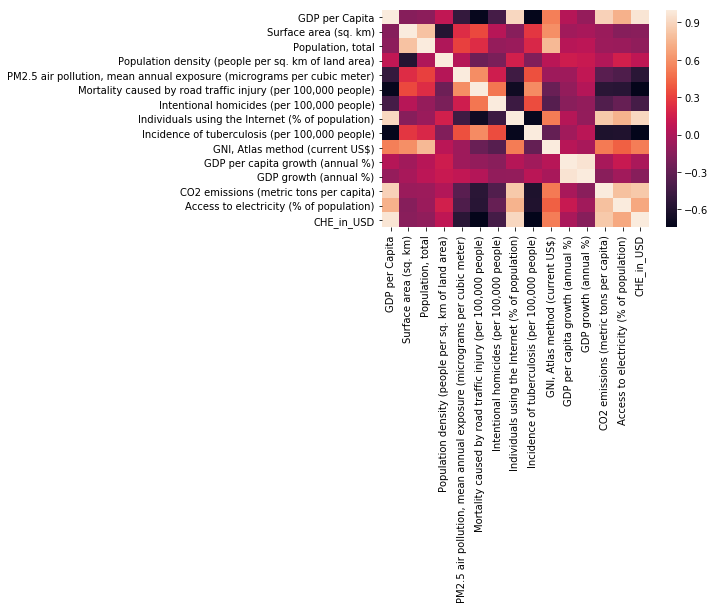

In [11]:
corr = X.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)